# Module 4 Challenge

In [1]:
# Required Imports
import pandas as pd
from pathlib import Path
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

## Data Cleaning

This section of the challenge will include reading CSV files into DataFrames, perfoming data cleaning steps; alongwith concatinating all DataFrames into a single DataFrame.

The CSV files contain data on:

* `Whale Portfolio Returns`

* `Algorithmic Trading Portfolio Returns`

* `S&P TSX 60 historical prices`

### Whale Returns

Reading the Whale Portfolio daily returns and cleaning the data.

In [2]:


whale_returns_path = Path(r"Resources/whale_returns.csv").absolute()



whale_returns_df = pd.read_csv(
    whale_returns_path,
    index_col="Date",
    parse_dates=True,
    infer_datetime_format=True)


In [3]:
# Identifying nulls

whale_returns_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Dropping nulls

whale_returns_df.dropna(inplace=True)


### Algorithmic Daily Returns

Reading the Algorithimic Portfolios daily returns and cleaning the data.

In [5]:
# Reading algorithmic data

algo_returns_path = Path(r"resources/algo_returns.csv").absolute()

algo_returns_df = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)


In [6]:
# Identifying nulls

algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Dropping nulls

algo_returns_df.dropna(inplace=True)

### S&P TSX 60 Returns

Reading the S&P TSX 60 historic prices and creating a new daily returns DataFrame from the data.

In [8]:
# Reading S&P 60 TSX

sp_tsx_history_path = Path(r"Resources/sp_tsx_history.csv").absolute()

sp_tsx_history_df = pd.read_csv(sp_tsx_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)


In [9]:
# Checking data types

sp_tsx_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fixing data types

sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$", "")
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(",", "")

sp_tsx_history_df = sp_tsx_history_df.astype("float64")

C:\Users\prath\AppData\Local\Temp\ipykernel_17108\1303797987.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$", "")


In [11]:
# Calculating S&P TSX daily returns

sp_tsx_daily_returns = sp_tsx_history_df.pct_change()

In [12]:
# Dropping nulls

sp_tsx_daily_returns.dropna(inplace=True)

In [13]:
# Renaming column 'close' accordingly

sp_tsx_daily_returns.rename(columns={"Close": "S&P TSX"}, inplace=True)

### Combining Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Concatinating all portfolios

combined_returns_df = pd.concat([
    whale_returns_df, algo_returns_df, sp_tsx_daily_returns], axis=1, join="inner")

# Projecting new data frame

combined_returns_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

## Conducting Quantitative Analysis

This section of analysis will focus on calculating and visualizing performance and risk metrics for the portfolio.

### Performance Analysis

##### Calculating and Plotting the Daily Returns.

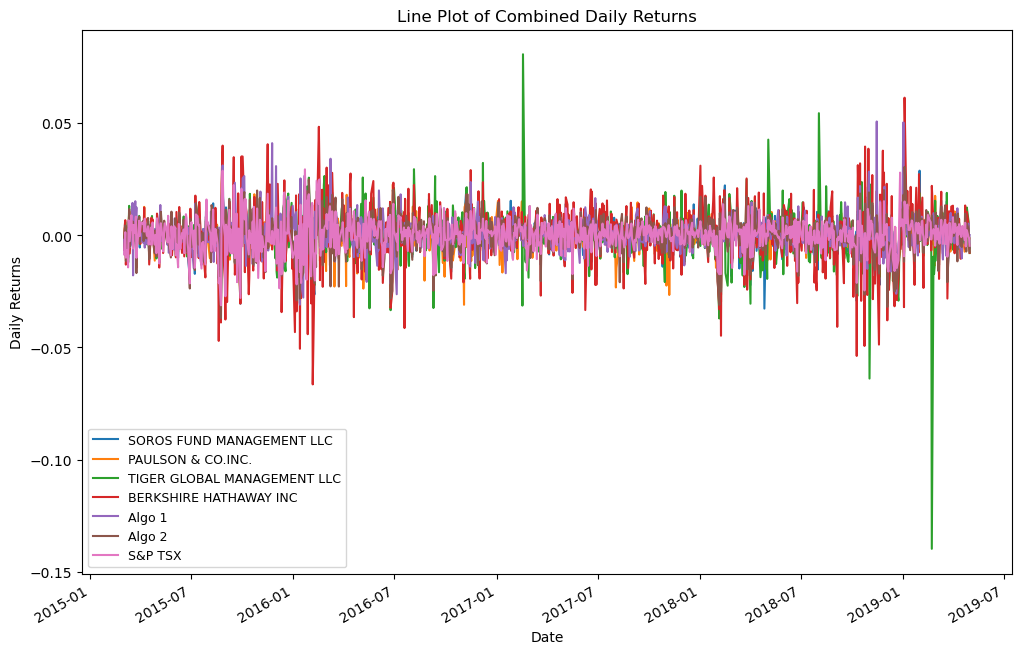

In [15]:
# Calculating and plotting daily returns

combined_returns_df.plot(figsize=(12,8), xlabel="Date", ylabel="Daily Returns", 
                         title="Line Plot of Combined Daily Returns").legend(fontsize=9)

plt.show()

##### Calculating and Plotting Cumulative Returns.

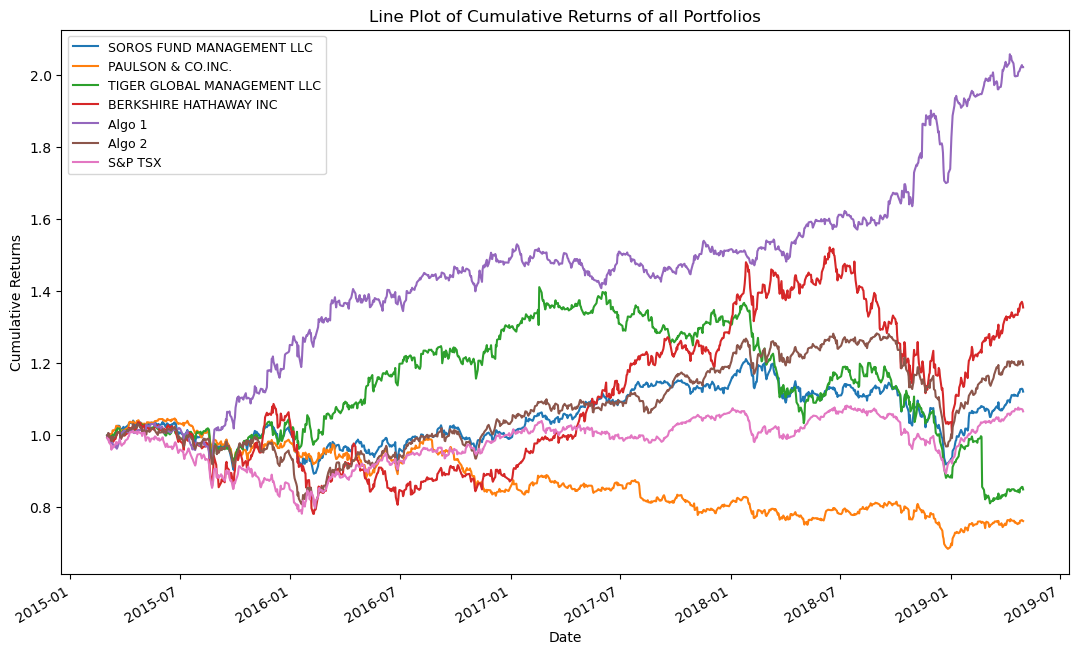

In [16]:
# Calculate cumulative returns of all portfolios

combined_cumulative_returns_df = (1 + combined_returns_df).cumprod()

# Plot cumulative returns

combined_cumulative_returns_df.plot(
    kind="line",
    figsize=(13,8),
    xlabel="Date", ylabel="Cumulative Returns", 
    title="Line Plot of Cumulative Returns of all Portfolios").legend(fontsize=9)
plt.show()

---

### Risk Analysis

Determining the risk of each portfolio:

1. Creating a box plot for each portfolio. 
2. Calculating the standard deviation for all portfolios.
4. Determining which portfolios are riskier than the S&P TSX 60.
5. Calculating the Annualized Standard Deviation.

#### Creating a box plot for each portfolio

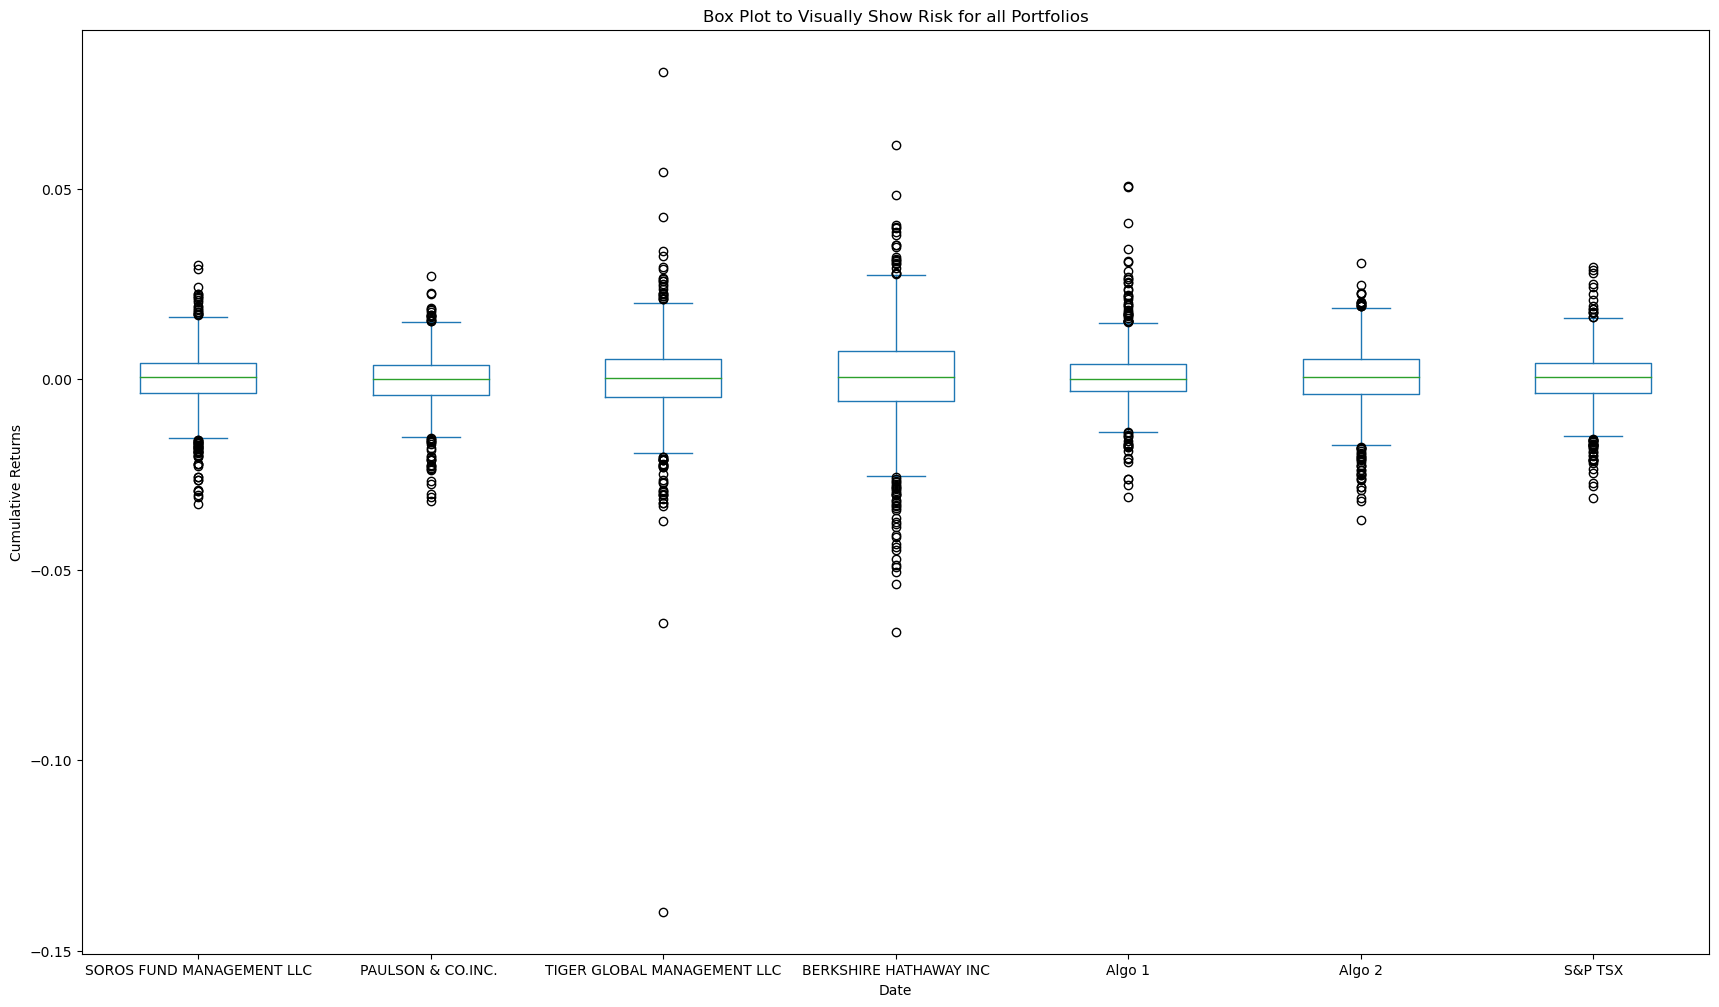

In [59]:
# Box plot to visually show risk

combined_returns_df.plot(
    kind="box",
    figsize=(21,12),
    xlabel="Date", ylabel="Cumulative Returns", 
    title="Box Plot to Visually Show Risk for all Portfolios",
    )
plt.show()


#### Calculating Standard Deviations

In [18]:
# Calculating all portfolios standard deviations

combined_std_df = combined_returns_df.std()

combined_std_df


SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

#### Determining which portfolios are riskier than the S&P TSX 60

In [19]:
# Calculating the daily standard deviation of S&P TSX 60

sp_tsx_std = sp_tsx_daily_returns.std()

sp_tsx_std


S&P TSX    0.006637
dtype: float64

In [20]:
# Determining which portfolios are riskier than the S&P TSX 60

combined_std_df.sort_values(ascending=True, inplace=True)


**Portfolios riskier than the S&P TSX 60 are:**
* Algo 1

* SOROS FUND MANAGEMENT LLC

* Algo 2

* TIGER GLOBAL MANAGEMENT LLC

* BERKSHIRE HATHAWAY INC

#### Calculating the Annualized Standard Deviation

In [21]:

annualized_std_df = combined_std_df * np.sqrt(252)

annualized_std_df


PAULSON & CO.INC.              0.110841
S&P TSX                        0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

### Rolling Statistics

Risk changes

#### Calculating and plotting rolling `std` for all portfolios with 21-day window

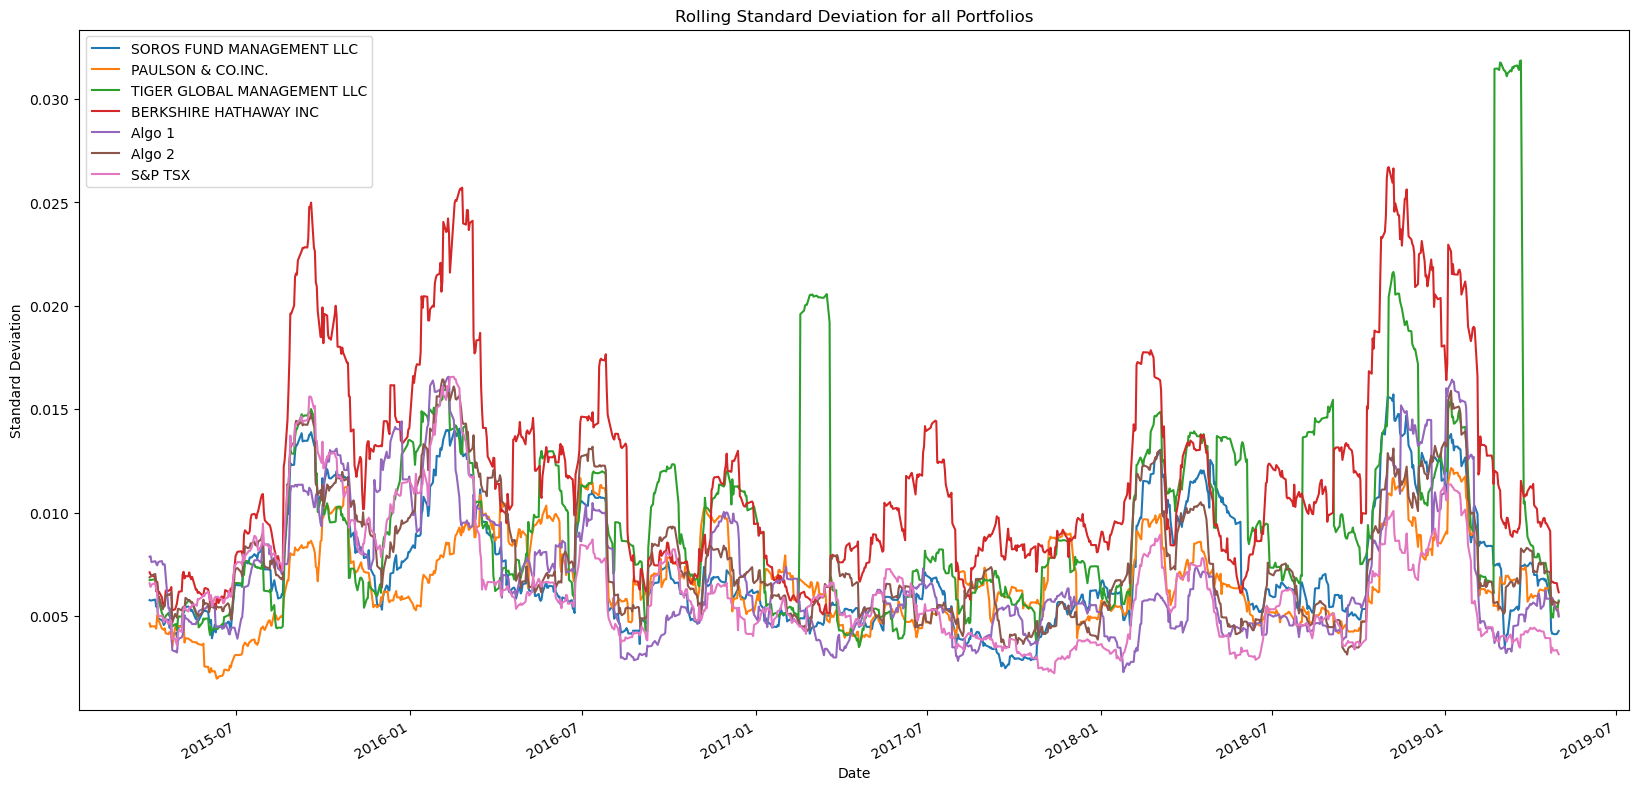

In [22]:
# Calculating the rolling standard deviation for all portfolios using a 21-day window

combined_rolling_std_df = combined_returns_df.rolling(window=21).std()

# Plot the rolling standard deviation

combined_rolling_std_df.plot(
    figsize=(20,10),
    xlabel="Date",
    ylabel="Standard Deviation",
    title="Rolling Standard Deviation for all Portfolios")
plt.show()


#### Calculating and plotting the correlation

In [23]:
# Calculating the correlation

combined_correlation_df = combined_returns_df.corr()

# Displaying the correlation matrix

combined_correlation_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


#### Calculating and Plotting Beta for a chosen portfolio and the S&P 60 TSX

In [39]:
# Calculating covariance of a single portfolio

rolling_algo1_covariance = algo_returns_df["Algo 1"].rolling(window=21).cov(sp_tsx_daily_returns["S&P TSX"])

rolling_algo2_covariance = algo_returns_df["Algo 2"].rolling(window=21).cov(sp_tsx_daily_returns["S&P TSX"])

# Calculating variance of S&P TSX

rolling_sp_tsx_variance = sp_tsx_daily_returns["S&P TSX"].rolling(window=21).var()

# Computing beta

rolling_algo1_beta = rolling_algo1_covariance / rolling_sp_tsx_variance
rolling_algo2_beta = rolling_algo2_covariance / rolling_sp_tsx_variance


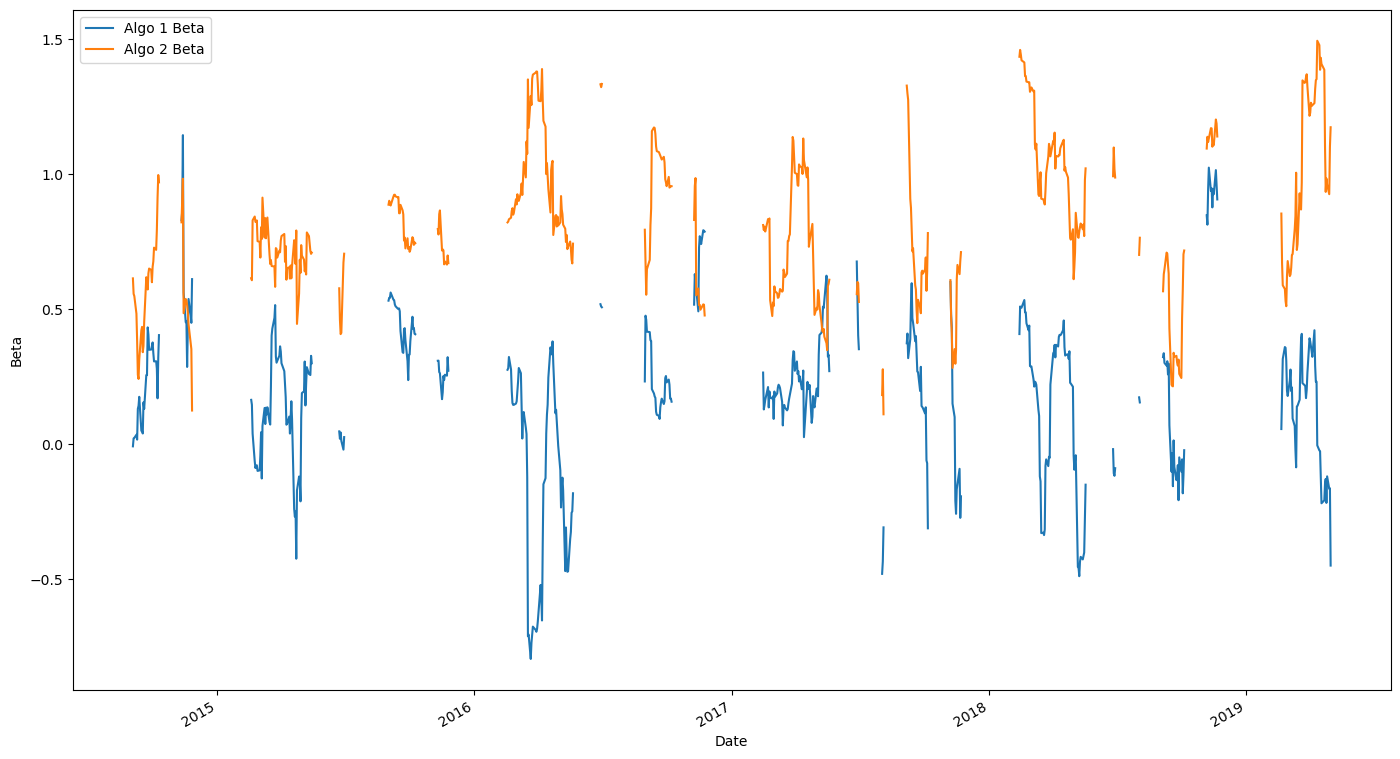

In [40]:
# Plotting beta trends

af = rolling_algo1_beta.plot()

rolling_algo2_beta.plot(ax=af, figsize=(17,10),
    ylabel="Beta")

af.legend(["Algo 1 Beta", "Algo 2 Beta"]);


### Rolling Statistics Challenge: Exponentially Weighted Average


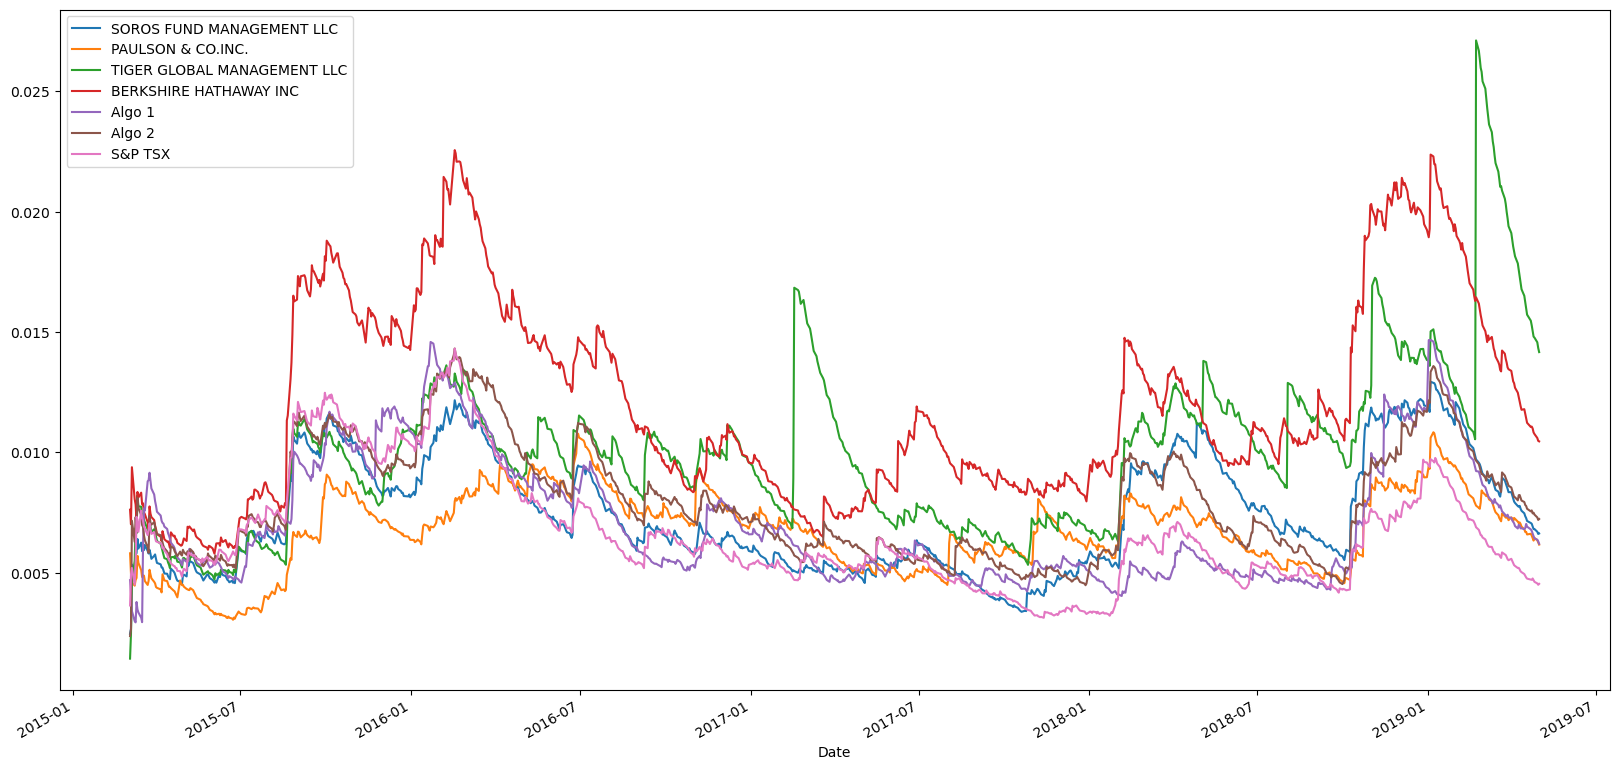

In [26]:
# Using `ewm` to calculate the rolling window

combined_returns_df.ewm(halflife=21, adjust=True, axis=0).std().plot(
    figsize=(20,10),
    legend=9
)
plt.show()

---

## Sharpe Ratios

#### Using the daily returns, calculating and visualizing the Sharpe ratios using a bar plot

In [27]:
# Calculating annualized sharpe ratios

combined_sharpe_ratio = ((combined_returns_df.mean() * 252) / (combined_returns_df.std() * 
                            np.sqrt(252)))
combined_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

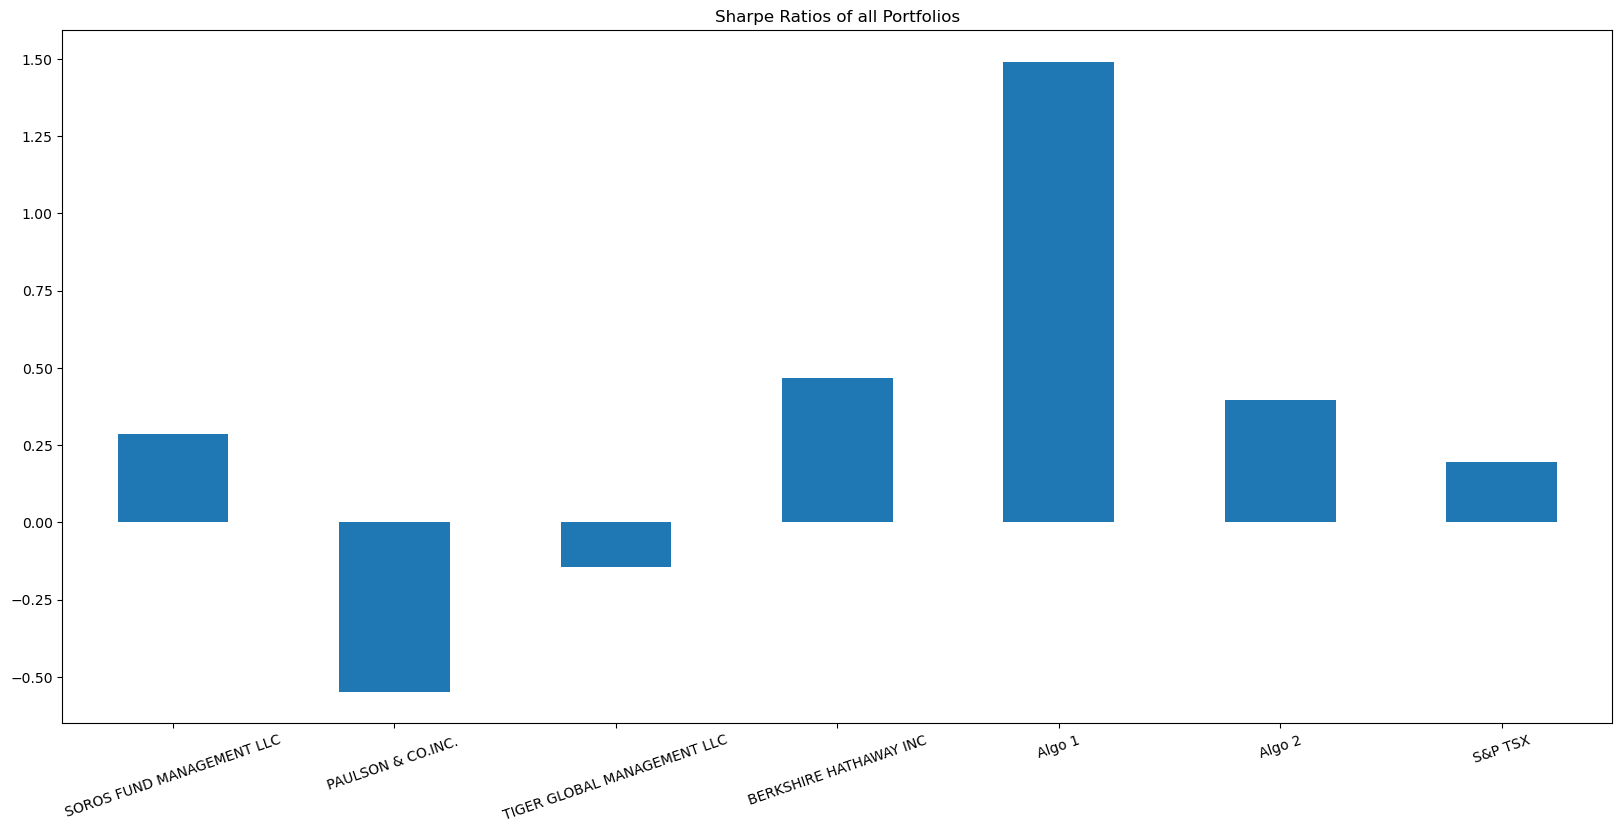

In [28]:
# Visualizing the sharpe ratios as a bar plot

combined_sharpe_ratio.plot.bar(
    figsize=(20,9),
    rot=19,
    title="Sharpe Ratios of all Portfolios")
plt.show()


#### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

The algorithmic strategies did outperform most of the portfolios in the combined dataframe except Berkshire Hathaway INC.. Berkshire Hathaway INC did compete with the Algo 2 but considering the overall portfolios the algorithmic strategies proved supeior even from whale portfolios.

---

## Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

### Choosing 3-5 custom stocks with almost 2 year's worth of historic prices and creating a DataFrame of the closing prices and dates for each stock.

In [29]:
# Reading data from BAH historic data

bah_path = Path(r"Resources/bah_historic.csv").absolute()

bah_historic_df = pd.read_csv(bah_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
bah_historic_df.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
bah_historic_df.head()

,Close
Date,
2017-09-18,35.93
2017-09-19,36.34
2017-09-20,36.77
2017-09-21,36.85
2017-09-22,36.86


In [30]:
# Reading data from BNS stock

bns_path = Path(r"Resources/bns_historic.csv").absolute()

bns_historic_df = pd.read_csv(bns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
bns_historic_df.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
bns_historic_df.head()

,Close
Date,
2017-09-18,62.74
2017-09-19,63.00
2017-09-20,63.22
2017-09-21,64.31
2017-09-22,64.63


In [31]:
# Reading data from WMT stock

wmt_path = Path(r"Resources/wmt_historic.csv").absolute()

wmt_historic_df = pd.read_csv(wmt_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
wmt_historic_df.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
wmt_historic_df.head()

,Close
Date,
2017-09-18,80.00
2017-09-19,80.05
2017-09-20,80.50
2017-09-21,80.01
2017-09-22,79.53


In [32]:
# Reading data from HRB stock

hrb_path = Path(r"Resources/hrb_historic.csv")

hrb_historic_df = pd.read_csv(hrb_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
hrb_historic_df.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
hrb_historic_df.head()

,Close
Date,
2017-09-18,25.98
2017-09-19,26.16
2017-09-20,26.21
2017-09-21,26.21
2017-09-22,26.75


In [33]:
# Combining all stocks in a single DataFrame

custom_df = pd.concat([
    bah_historic_df, bns_historic_df, wmt_historic_df, hrb_historic_df],
    axis=1,
    join='inner')


In [34]:
# Reorganizing portfolio data by having a column per symbol

custom_df.columns = ["BAH", "BNS", "WMT", "HRB"]


In [35]:
# Calculate daily returns

custom_daily_returns = custom_df.pct_change()

# Drop NAs

custom_daily_returns.dropna(inplace=True)

# Display sample data

custom_daily_returns.head()

,BAH,BNS,WMT,HRB
Date,,,,
2017-09-19,0.011411,0.004144,0.000625,0.006928
2017-09-20,0.011833,0.003492,0.005621,0.001911
2017-09-21,0.002176,0.017241,-0.006087,0.000000
2017-09-22,0.000271,0.004976,-0.005999,0.020603
2017-09-25,0.000000,-0.003559,-0.004778,-0.020187


### Calculating the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Setting weights
weights = [1/4, 1/4, 1/4, 1/4]

# Calculating portfolio return
portfolio_based_returns = custom_daily_returns.dot(weights)

# Displaying sample data
portfolio_based_returns.head()

Date
2017-09-19    0.005777
2017-09-20    0.005714
2017-09-21    0.003333
2017-09-22    0.004963
2017-09-25   -0.007131
dtype: float64

### Joining your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Joining my custom returns DataFrame to the original returns DataFrame

joined_returns_df = pd.concat([combined_returns_df, custom_daily_returns],
    axis=1,
    join='inner')


In [38]:
# Only comparing dates where return data exists for all the stocks (droping NaNs)

joined_returns_df.dropna(inplace=True)

### Re-running the risk analysis with your portfolio to see how it compares to the others

#### Calculating the Annualized Standard Deviation

In [42]:
# Calculating the annualized 'std'

joined_std = (joined_returns_df.std()) * np.sqrt(252)


#### Calculating and ploting rolling `std` with 21-day window

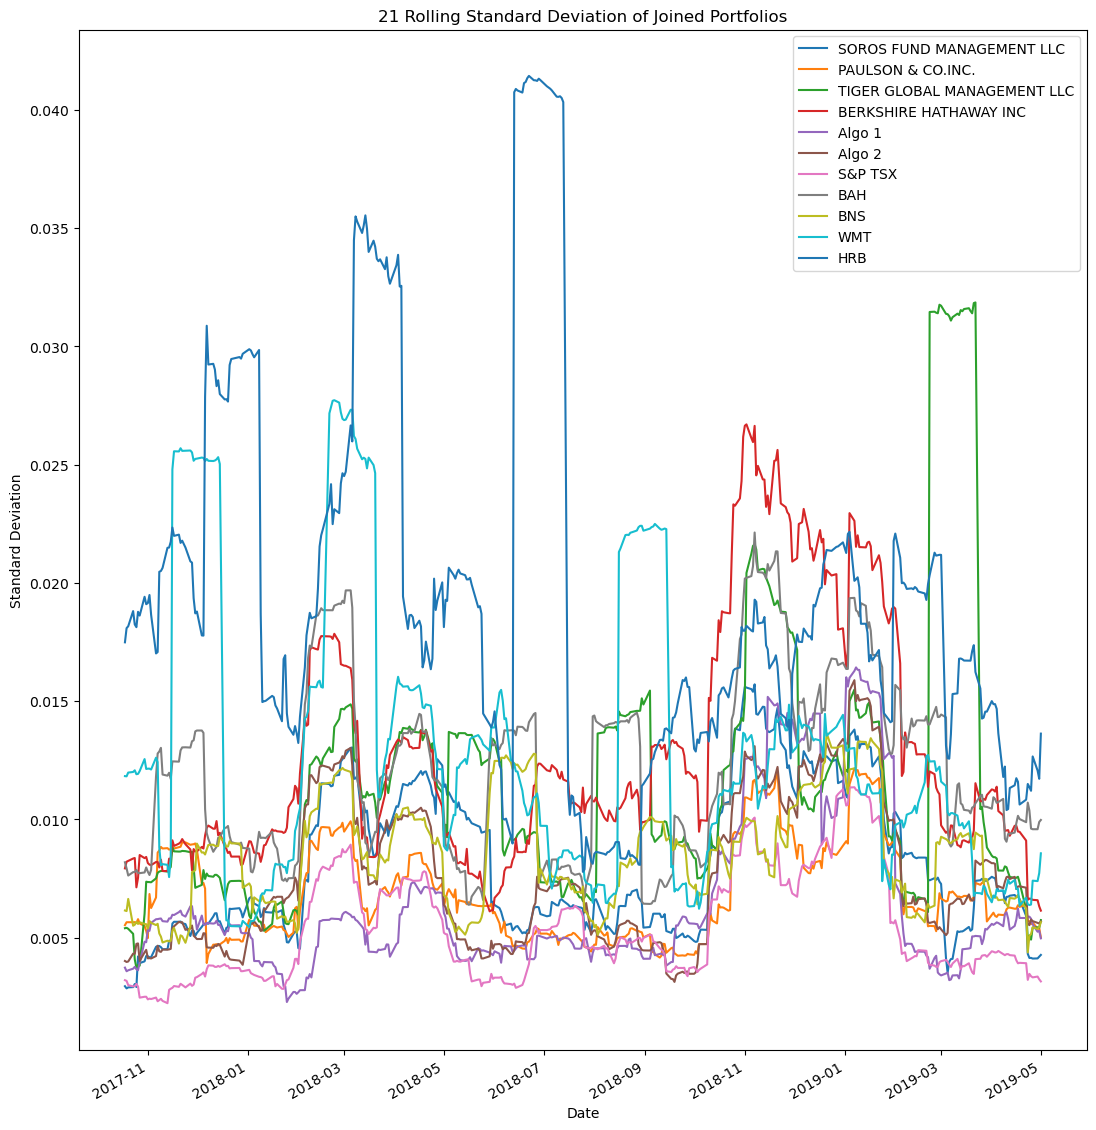

In [50]:
# Calculate rolling standard deviation

joined_rolling_std = joined_returns_df.rolling(window=21).std()

# Plotting rolling standard deviation

joined_rolling_std.plot(
    figsize=(13,15),
    ylabel="Standard Deviation",
    title="21 Rolling Standard Deviation of Joined Portfolios",)
plt.show()


#### Calculating and ploting the correlation

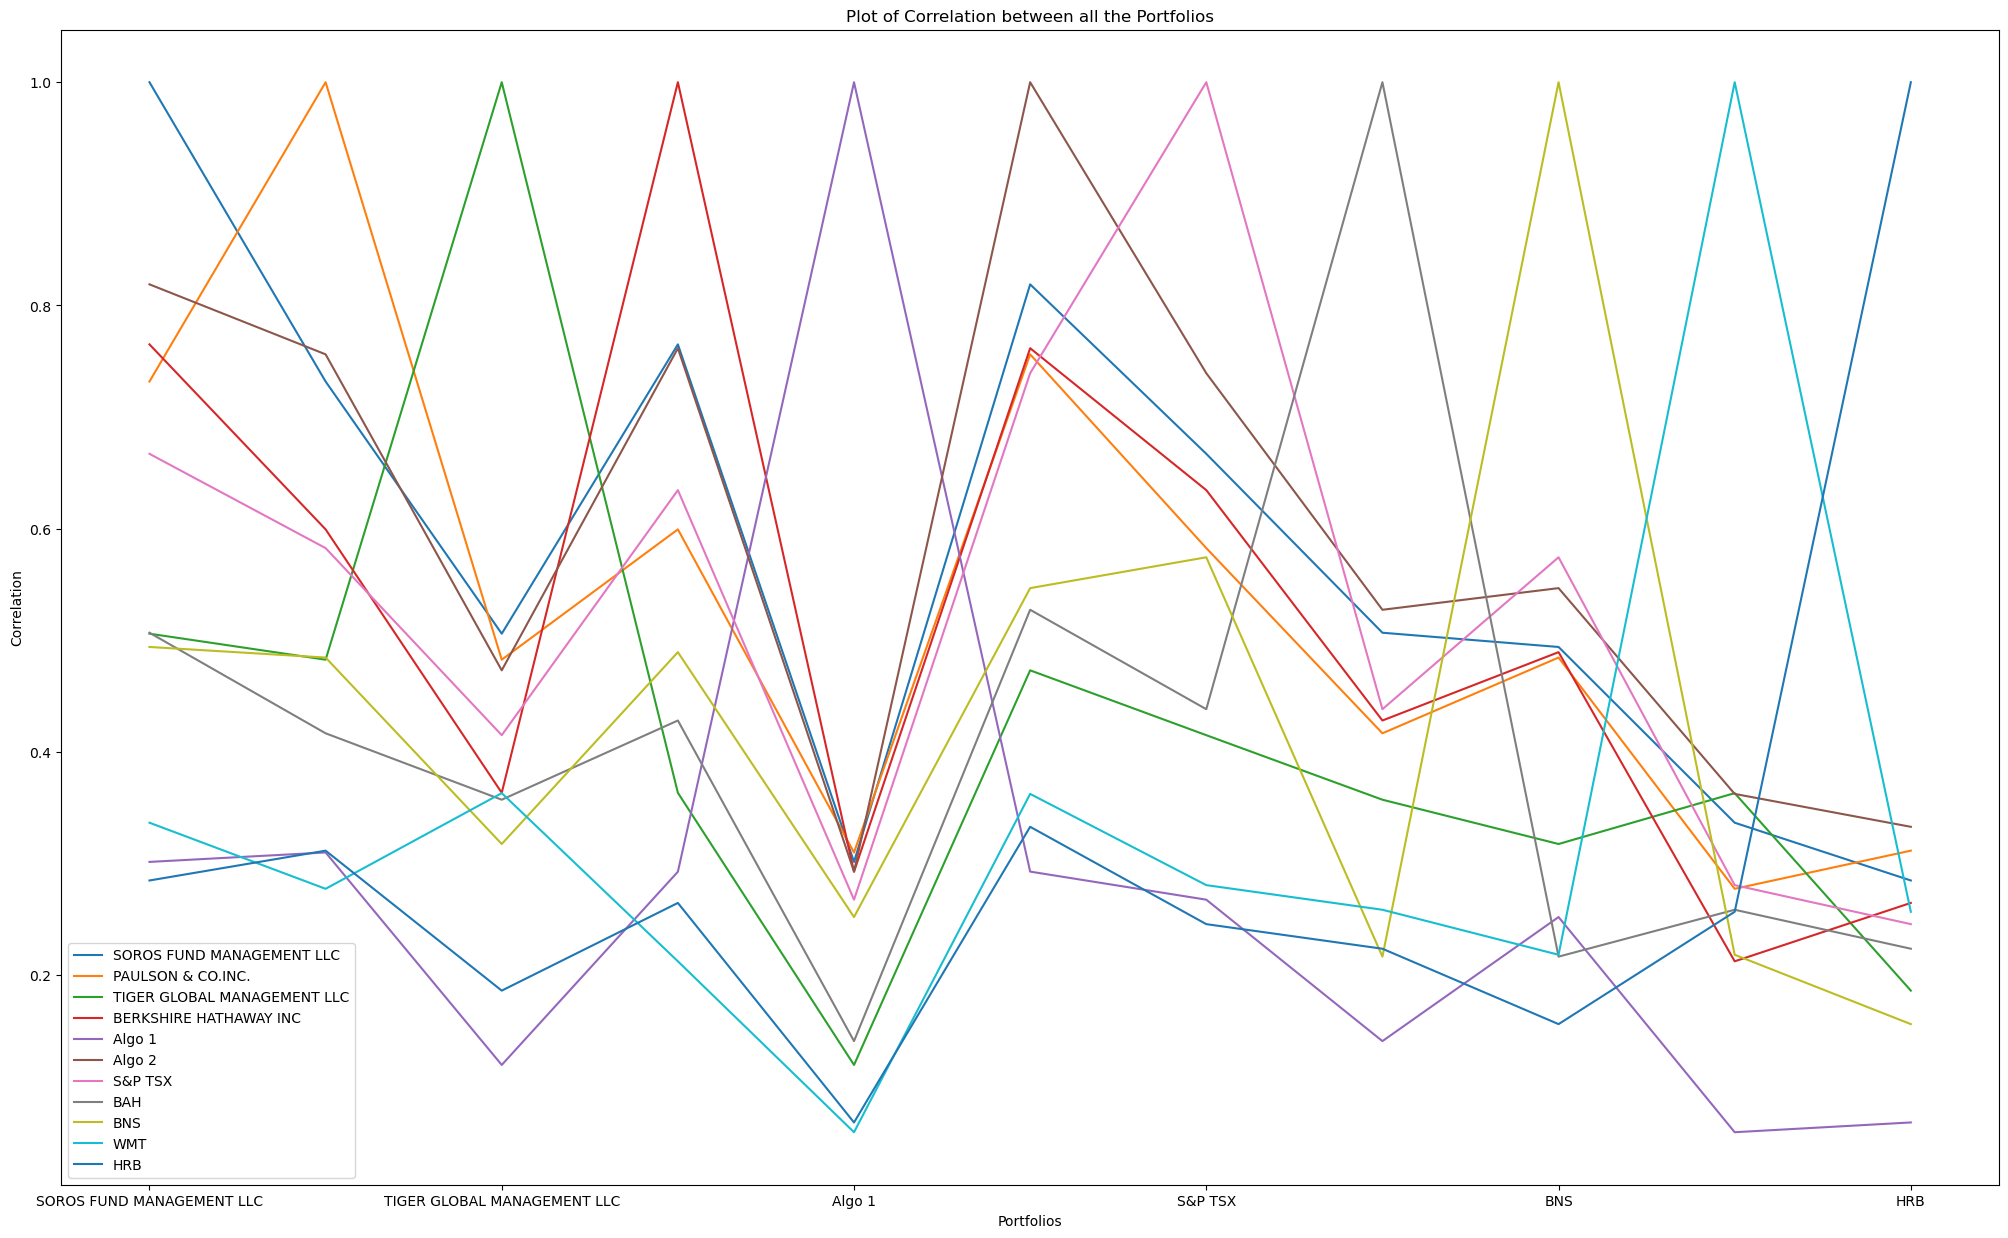

In [57]:

joined_correlation_df = joined_returns_df.corr()

joined_correlation_df.plot(
    figsize=(25,15),
    ylabel="Correlation",
    xlabel="Portfolios",
    title="Plot of Correlation between all the Portfolios")
plt.show()


#### Calculating and Ploting the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [60]:
# Calculating covariance of a single portfolio

rolling_bah_covariance = joined_returns_df["BAH"].rolling(window=60).cov(sp_tsx_daily_returns["S&P TSX"])

rolling_bns_covariance = joined_returns_df["BNS"].rolling(window=60).cov(sp_tsx_daily_returns["S&P TSX"])

rolling_wmt_covariance = joined_returns_df["WMT"].rolling(window=60).cov(sp_tsx_daily_returns["S&P TSX"])

rolling_hrb_covariance = joined_returns_df["HRB"].rolling(window=60).cov(sp_tsx_daily_returns["S&P TSX"])

# Calculating variance of S&P TSX

rolling_sp_tsx_60variance = sp_tsx_daily_returns["S&P TSX"].rolling(window=60).var()

# Computing beta

rolling_bah_beta = rolling_bah_covariance / rolling_sp_tsx_60variance
rolling_bns_beta = rolling_bns_covariance / rolling_sp_tsx_60variance
rolling_wmt_beta = rolling_wmt_covariance / rolling_sp_tsx_60variance
rolling_hrb_beta = rolling_hrb_covariance / rolling_sp_tsx_60variance


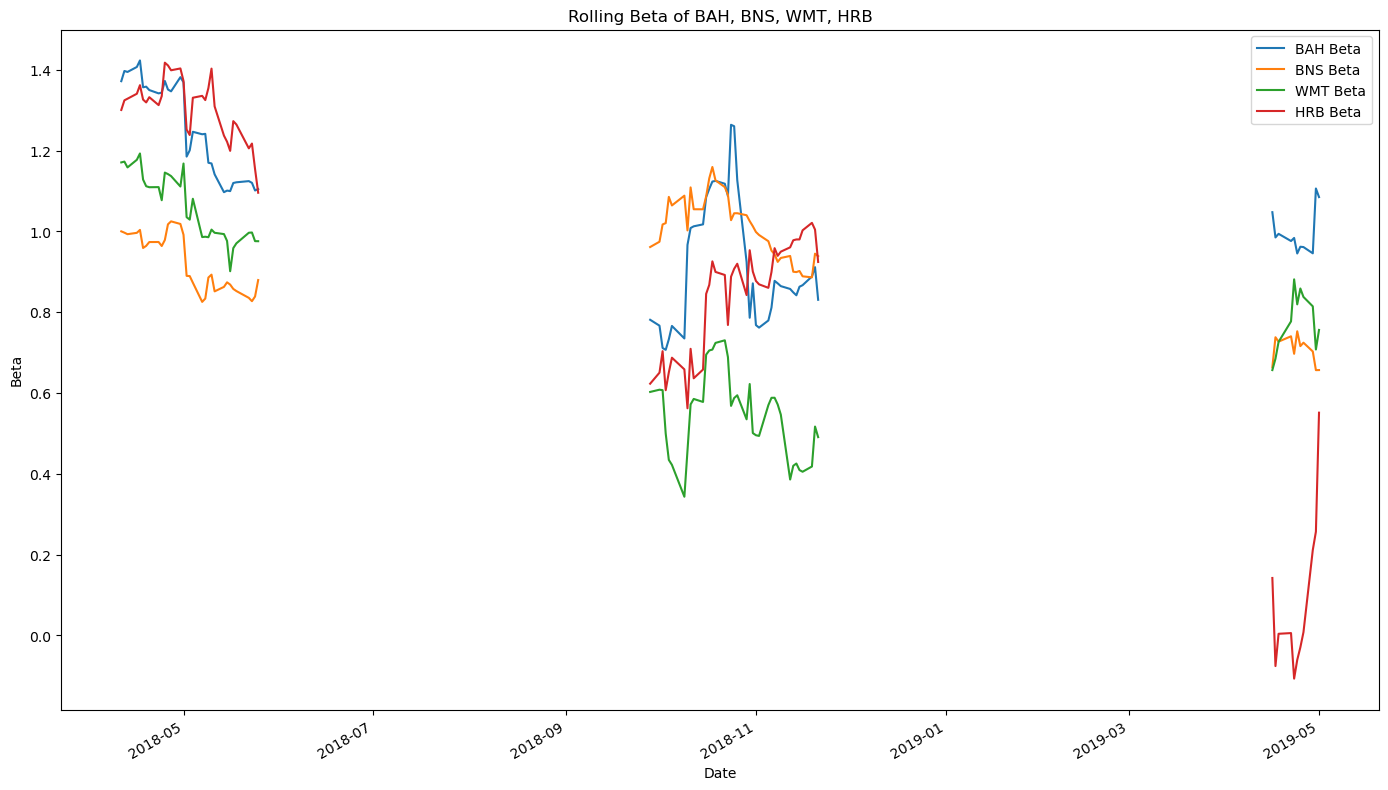

In [66]:
# Plotting beta trends

af = rolling_bah_beta.plot(figsize=(17,10), ylabel="Beta", legend = 12, title="Rolling Beta of BAH, BNS, WMT, HRB")

rolling_bns_beta.plot(ax=af)

rolling_wmt_beta.plot(ax=af)

rolling_hrb_beta.plot(ax=af)

af.legend(["BAH Beta", "BNS Beta", "WMT Beta", "HRB Beta"]);

#### Using the daily returns, calculating and visualizing the Sharpe ratios using a bar plot

In [61]:
# Calculating Annualized Sharpe Ratios

joined_sharpe_ratio = ((joined_returns_df.mean() * 252) / (joined_returns_df.std() * 
                            np.sqrt(252)))

joined_sharpe_ratio


SOROS FUND MANAGEMENT LLC     -0.034529
PAULSON & CO.INC.             -0.324648
TIGER GLOBAL MANAGEMENT LLC   -1.196661
BERKSHIRE HATHAWAY INC         0.292515
Algo 1                         1.866837
Algo 2                         0.361211
S&P TSX                        0.497409
BAH                            1.465721
BNS                           -0.546022
WMT                            0.535639
HRB                           -0.076697
dtype: float64

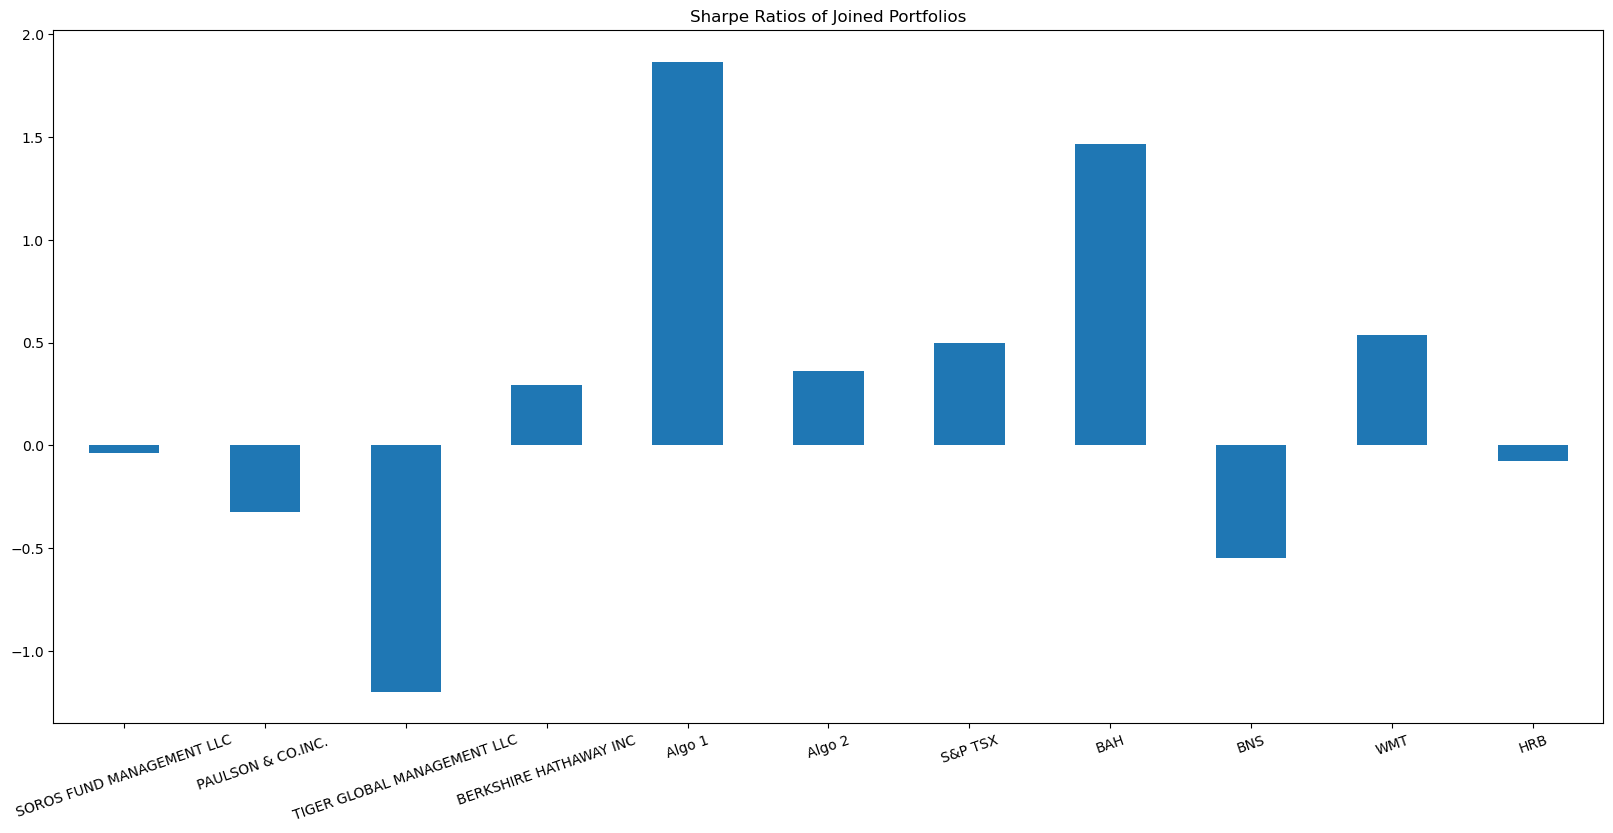

In [62]:
# Visualizing the sharpe ratios as a bar plot

joined_sharpe_ratio.plot.bar(
    figsize=(20,9),
    rot=19,
    title="Sharpe Ratios of Joined Portfolios")
plt.show()


#### How does your portfolio do?

My portfolio gives quite a competition to algorithmic portfolios and whale portfolio's. According to the stats the stocks in my portfolio that are highly volatile and a little downperforming show a strength for good performance!